In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['training', 'test', 'SampleSubmission.csv', 'IdLookupTable.csv']


In [2]:
training = pd.read_csv('../input/training/training.csv')

In [3]:
training_X = training.Image

In [4]:
training_Y = training.drop(['Image'], axis=1)

In [5]:
training_Y.isnull().any().value_counts()

True     28
False     2
dtype: int64

In [6]:
training_Y.fillna(method='ffill',inplace=True)

In [7]:
training_Y.isnull().any().value_counts()

False    30
dtype: int64

In [8]:
training_Y.shape

(7049, 30)

In [9]:
# convert image col to int  also check NaN
image_list=[]

for i in training_X:
    i=i.split(' ')
    image_list.append(i)
len(image_list)

7049

In [10]:
image_list = np.array(image_list,dtype=float)

In [11]:
train_x = image_list.reshape(-1, 96, 96, 1)

In [12]:
train_x = train_x/255

In [13]:
model= tf.keras.models.Sequential(
    
    layers=[
        
         #convolution 1st time
        tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(96,96,1)),
        tf.keras.layers.MaxPool2D(2,2),
     
         #convolution 2nd time
        tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(96,96,1)),
        tf.keras.layers.MaxPool2D(2,2),
       
         #convolution 2nd time
        tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation=tf.nn.relu,input_shape=(96,96,1)),
        tf.keras.layers.MaxPool2D(2,2),
      
        #input layer
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units=512,activation='relu'),
        tf.keras.layers.Dense(units=512,activation='relu'),
        tf.keras.layers.Dropout(0.3),
        

        # number of keypoint
        tf.keras.layers.Dense(units=30,activation='relu')
    ]
)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 94, 94, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 45, 45, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6400)              0

In [15]:
model.compile(optimizer='adam',
             loss='mse',
              metrics=['accuracy'])

In [16]:
hist=model.fit(train_x,training_Y,batch_size=128,epochs=200,verbose=1,validation_split=0.2)
hist

Train on 5639 samples, validate on 1410 samples
Epoch 1/200
5639/5639 [==============================] - 3s 480us/sample - loss: 592.3367 - acc: 0.1779 - val_loss: 82.3000 - val_acc: 0.3121
Epoch 2/200
5639/5639 [==============================] - 1s 162us/sample - loss: 80.0674 - acc: 0.3048 - val_loss: 11.6302 - val_acc: 0.4652
Epoch 3/200
5639/5639 [==============================] - 1s 163us/sample - loss: 49.1527 - acc: 0.3208 - val_loss: 10.5687 - val_acc: 0.6872
Epoch 4/200
5639/5639 [==============================] - 1s 161us/sample - loss: 42.5271 - acc: 0.3366 - val_loss: 12.7417 - val_acc: 0.6872
Epoch 5/200
5639/5639 [==============================] - 1s 162us/sample - loss: 37.5955 - acc: 0.3655 - val_loss: 23.9870 - val_acc: 0.6872
Epoch 6/200
5639/5639 [==============================] - 1s 162us/sample - loss: 34.0477 - acc: 0.3806 - val_loss: 8.4147 - val_acc: 0.6872
Epoch 7/200
5639/5639 [==============================] - 1s 161us/sample - loss: 32.1184 - acc: 0.3903 - v

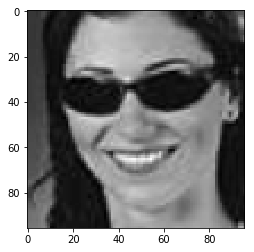

In [17]:
plt.imshow(image_list.reshape(-1,96,96)[3010],cmap='gray')

In [18]:
IMAGE_HEIGHT=96
IMAGE_WIDTH=96
#Ytrain.iloc[3010][Ytrain.iloc[3010].index[1]]
#np.dtype(Ytrain.iloc[3010]['left_eye_center_y'])
def img_show(image_list,train):
    fig,axes = plt.subplots(nrows=5,ncols=2,dpi=300,figsize=(12,12))

    for row in range(5):
        for col in range(1):
            #random number  generator for diff image
            j  =np.random.randint(0,len(train))
            X = image_list.reshape(-1,96,96)[j]
            Y = train

            Y=Y.iloc[j]# location of Y
            img = np.copy(X) #copy image
            for i in range(0,30,2):
            #print(Y[Y.index[i+1]])
                   if 0 < Y[Y.index[i]] < IMAGE_WIDTH and  0 < Y[Y.index[i+1]] < IMAGE_HEIGHT:
                    img[int(Y[Y.index[i+1]]),int(Y[Y.index[i]])] = 255
            axes[row,col].imshow(img,cmap='gray')
            axes[row,col+1].imshow(X,cmap='gray')
            #remove axies
            axes[row,col].axis('off')
            axes[row,col+1].axis('off')

    plt.tight_layout()

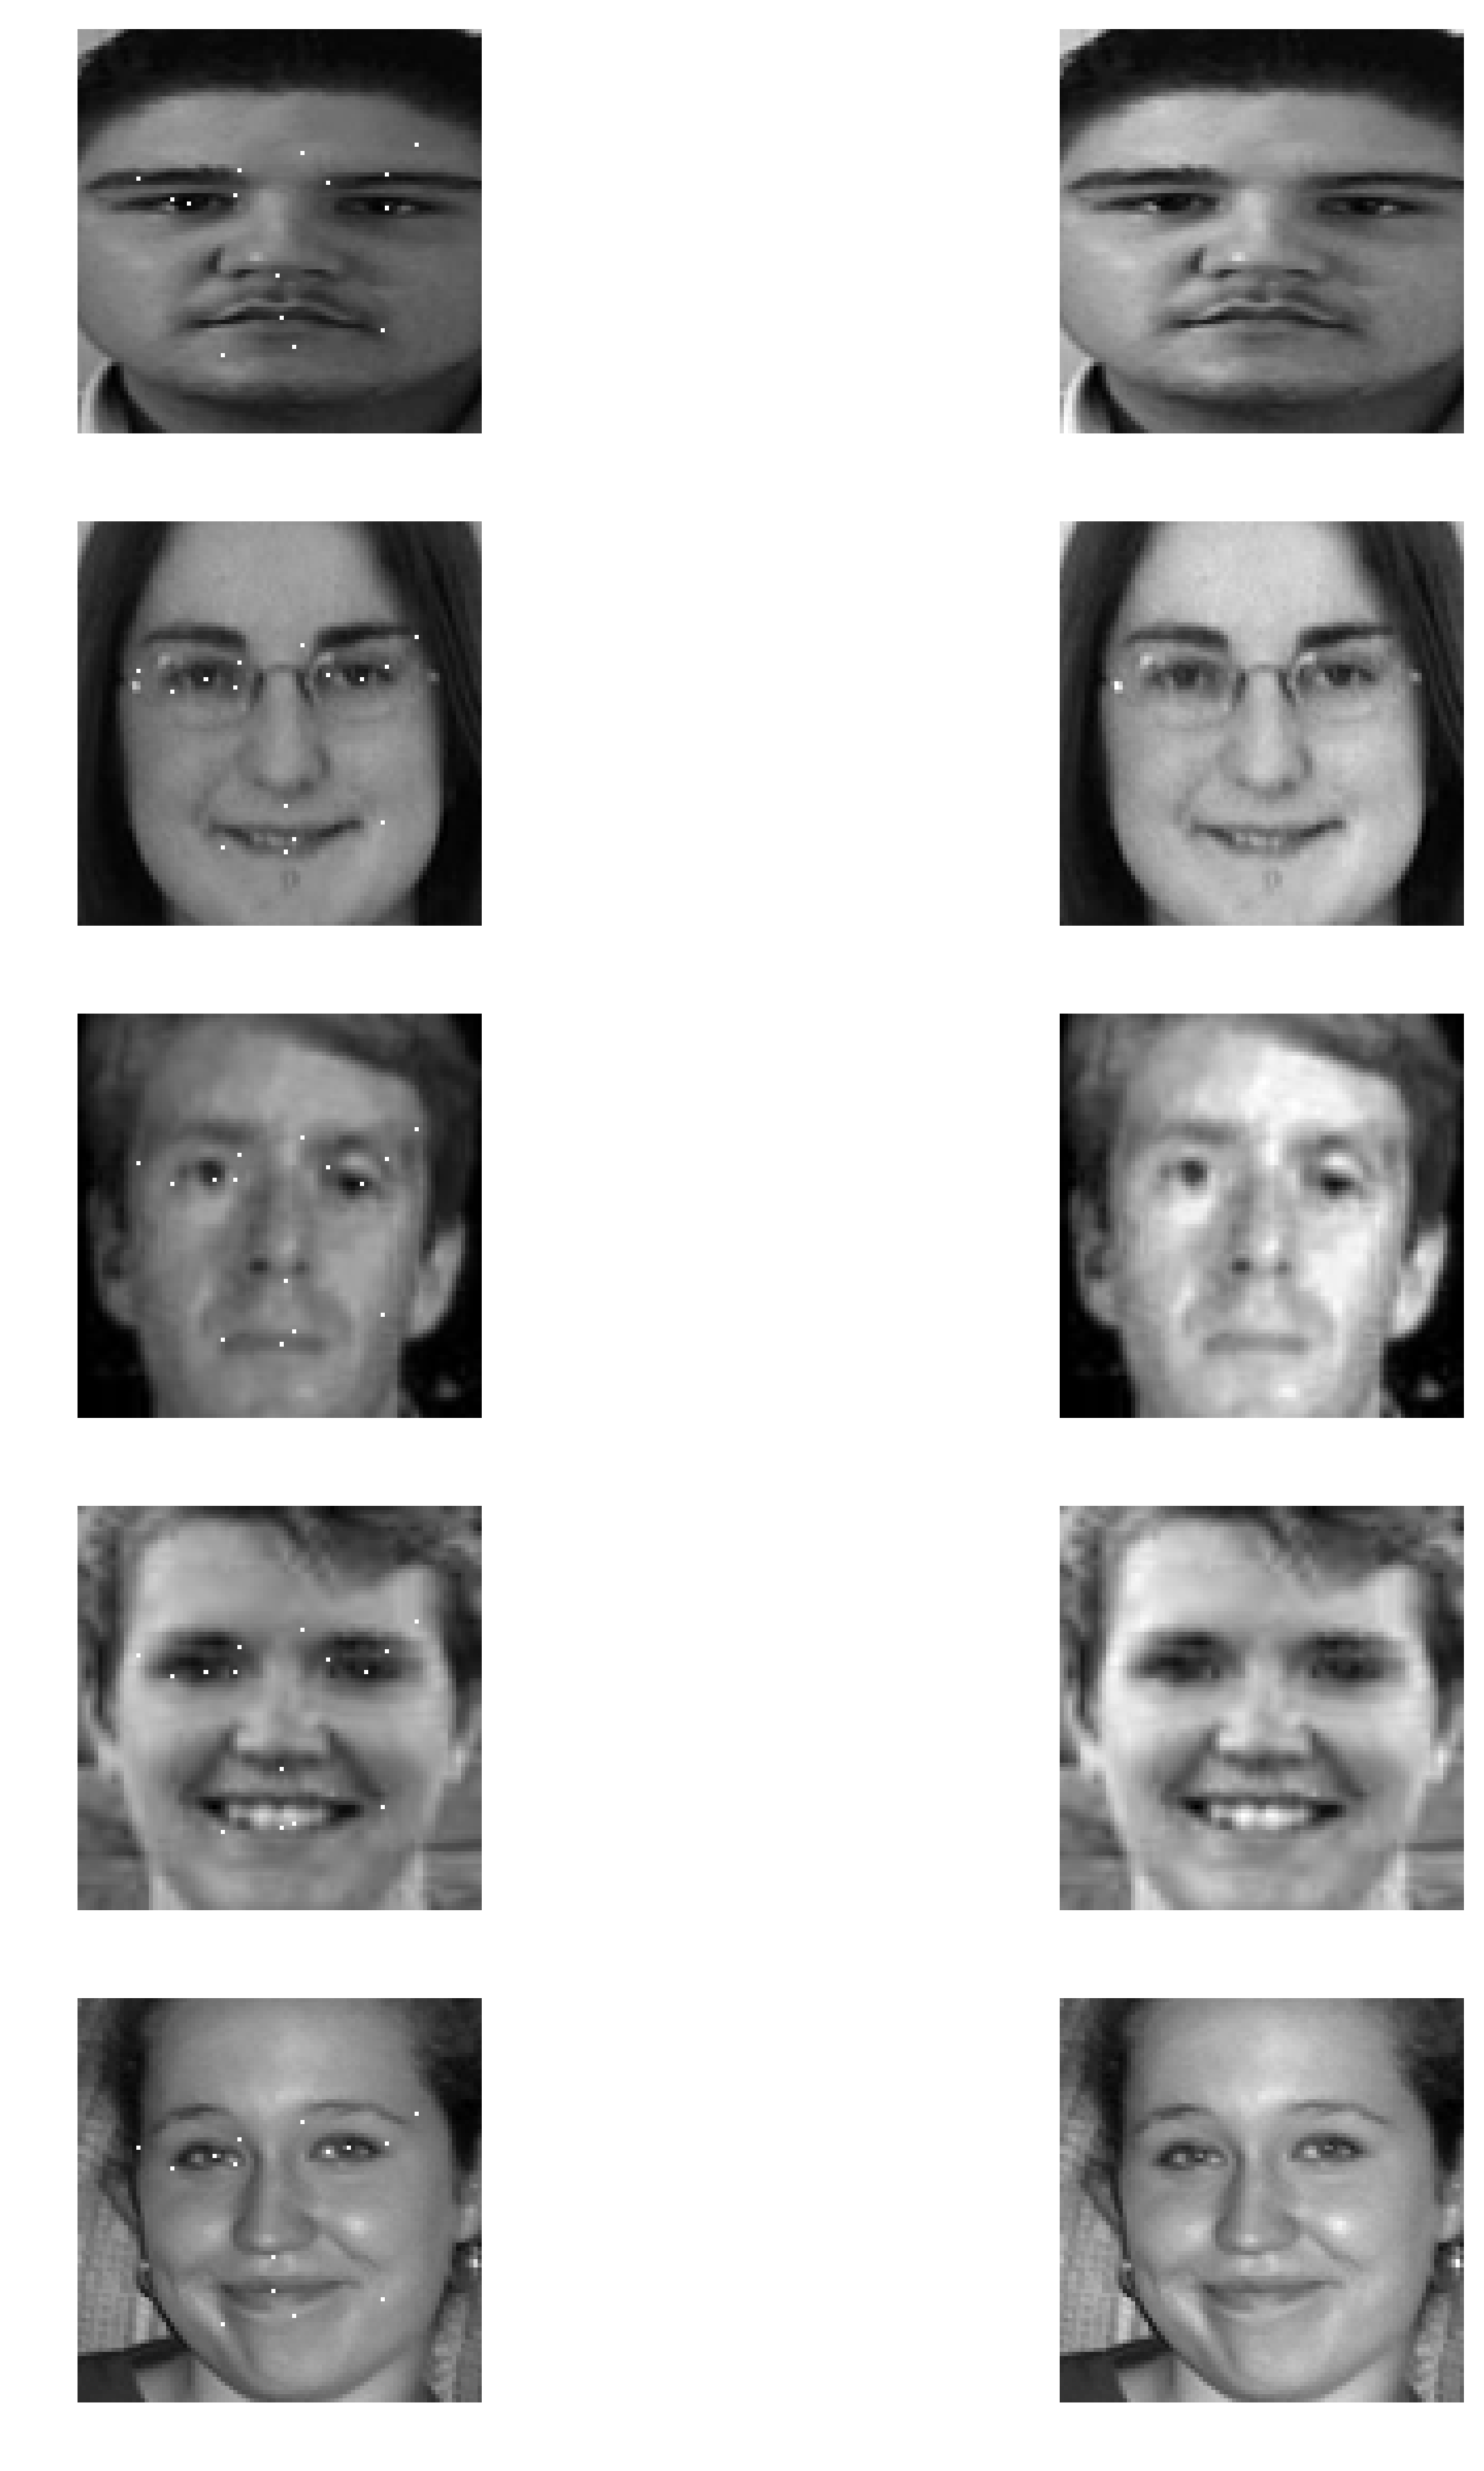

In [19]:
img_show(image_list,training_Y)

In [20]:
test = pd.read_csv('../input/test/test.csv')

In [21]:
image_list_test=[]

for i in test['Image']:
    i=i.split(' ')
    image_list_test.append(i)
len(image_list_test)

1783

In [22]:
image_list_test=np.array(image_list_test,dtype=float)
images=image_list_test.reshape(-1,96,96,1)
X_test =images/255.0

In [23]:
X_test.shape

(1783, 96, 96, 1)

In [24]:
pred = model.predict(X_test)

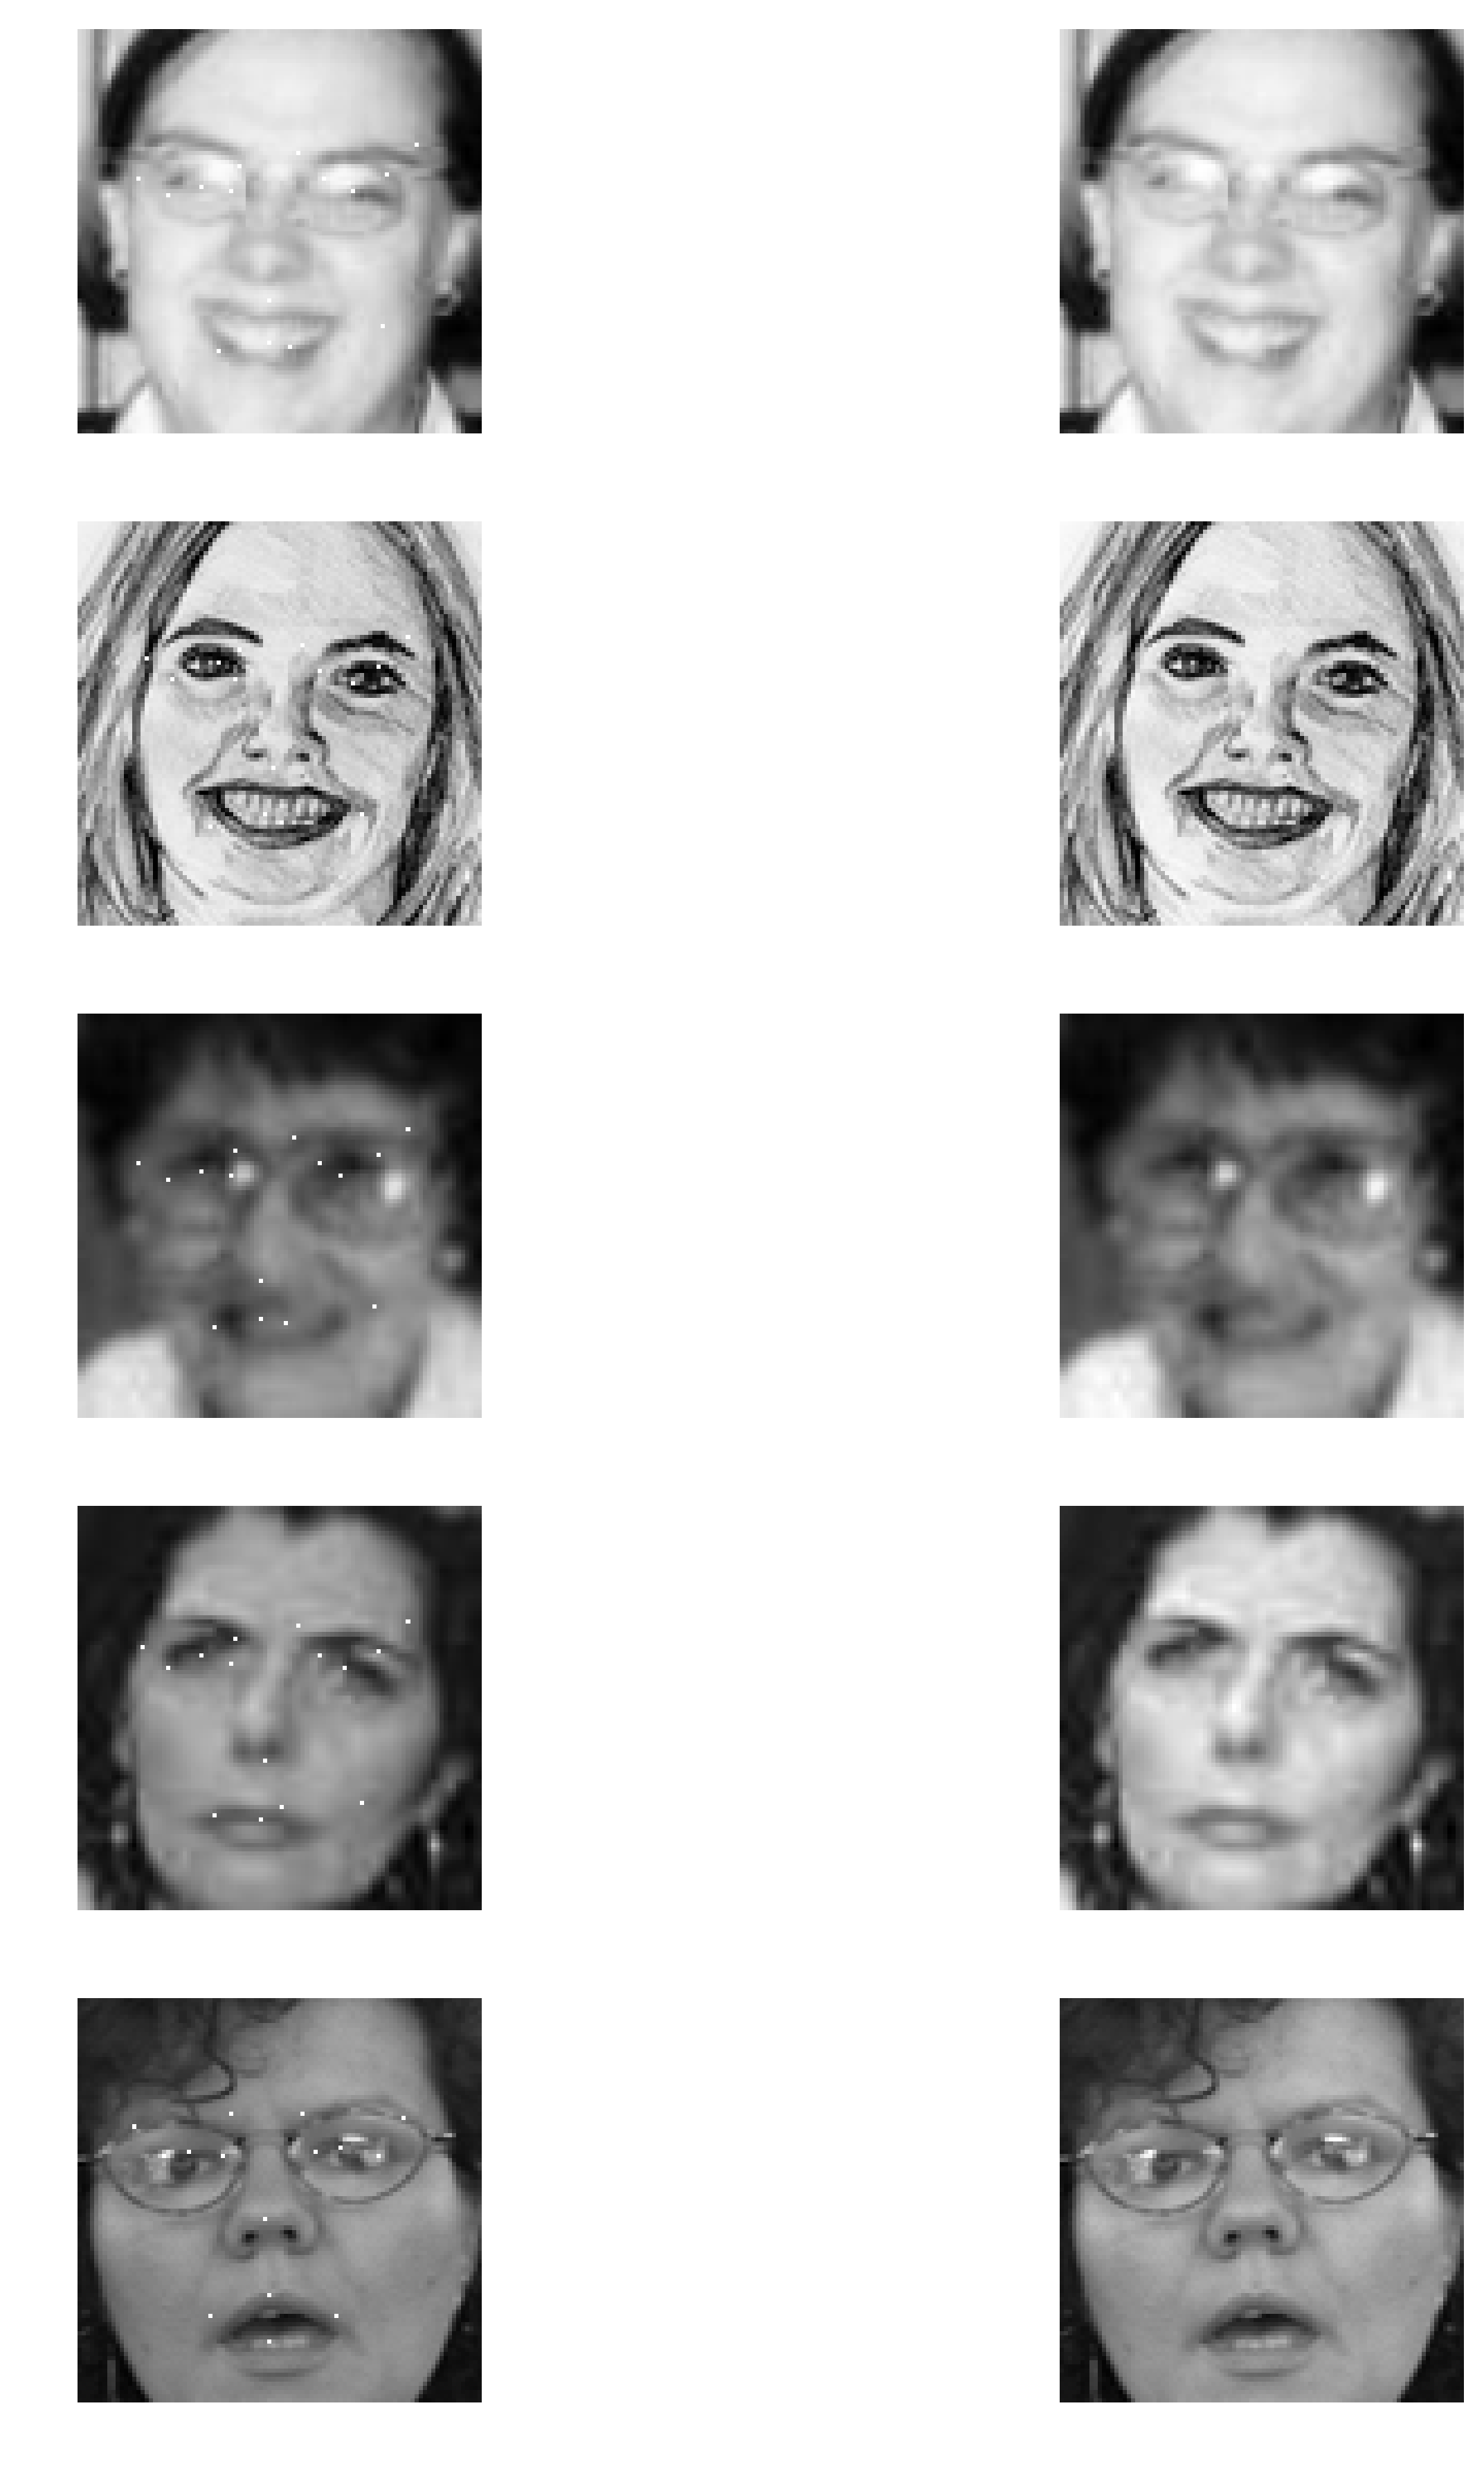

In [25]:
pv =pd.DataFrame(data=pred)
img_show(image_list_test,pv)

In [26]:
lookid_data = pd.read_csv('../input/IdLookupTable.csv')

In [27]:
lookid_list = list(lookid_data['FeatureName'])
imageID = list(lookid_data['ImageId']-1)
pre_list = list(pred)
rowid = lookid_data['RowId']
rowid=list(rowid)
feature = []
for f in list(lookid_data['FeatureName']):
    feature.append(lookid_list.index(f))
preded = []
for x,y in zip(imageID,feature):
    preded.append(pre_list[x][y])
rowid = pd.Series(rowid,name = 'RowId')
loc = pd.Series(preded,name = 'Location')
submission = pd.concat([rowid,loc],axis = 1)
submission.to_csv('submission.csv',index = False)

In [28]:
submission

,RowId,Location
0,1,65.067429
1,2,34.041420
2,3,27.171236
3,4,34.715092
4,5,58.004761
5,6,35.010460
6,7,71.819267
7,8,35.093277
8,9,34.280563
9,10,35.562984


<Figure size 432x288 with 0 Axes>

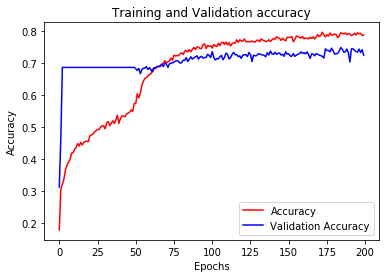

<Figure size 432x288 with 0 Axes>

In [29]:
acc = hist.history['acc']
val_acc = hist.history['val_acc']
loss = hist.history['loss']
val_loss = hist.history['val_loss']
epochs=range(len(acc))
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation accuracy')
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.figure()

<Figure size 432x288 with 0 Axes>

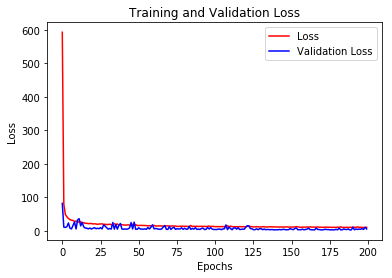

<Figure size 432x288 with 0 Axes>

In [30]:
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend(['Loss', 'Validation Loss'])
plt.figure()